In [21]:
#%%
"""
Normal density recovery using FFT
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate


In [22]:
def RecoverDensity(cf,x,N = 8192):
    i = complex(0.0,1.0) #assigning i=sqrt(-1)

    # specification of the grid for u
    u_max = 20.0             ### This is the max u where spinning stops. This has be much larger if the distribution is peaked than Guassian
    du = u_max / N
    u = np.linspace(0,N-1,N) * du


    # grid for x
    b   = np.min(x)
    dx  = 2.0*np.pi / (N*du)
    x_i = b + np.linspace(0,N-1,N) * dx

    phi = np.exp(-i*b*u) * cf(u)     ### Note that b is a positive number in the slides but here it's negative, that's why negative sign.

    gamma_1 = np.exp(-i*x_i*u[0])*cf(u[0])
    gamma_2 = np.exp(-i*x_i*u[-1])*cf(u[-1])

    phi_boundary = 0.5 * (gamma_1 + gamma_2)

    f_xi = du/np.pi * np.real(fft.fft(phi)- phi_boundary)   ### Remember that FFT is run on N points so if x > N points, we need to interpolate

    f_xiInterp = interpolate.interp1d(x_i,f_xi,kind='cubic')

    return f_xiInterp(x)

def mainCalculation():
    i = complex(0.0, 1.0) #assigning i=sqrt(-1)

    # setting for normal distribution
    mu = 0.0
    sigma = 1.0

    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * sigma**2.0 * u**2.0);

    # define domain for density
    x = np.linspace(-8.0,8.0,100)
    f_XExact = st.norm.pdf(x,mu,sigma)

    # recovered density
    f_XR = RecoverDensity(cF,x,2**8)

    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.plot(x,f_XExact,'-r', label='Exact')
    plt.plot(x,f_XR,'--b', label='Recovered')
    plt.legend()


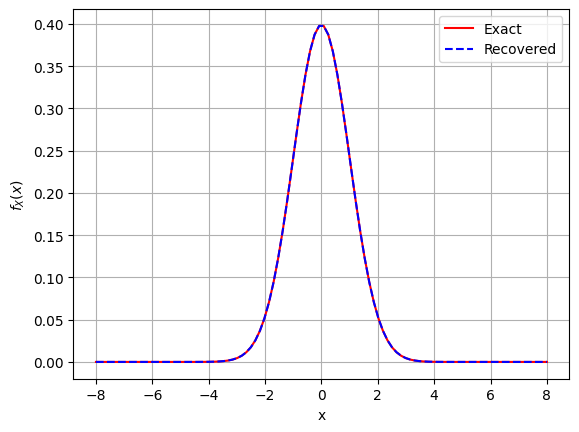

In [23]:
mainCalculation()